# 3.2	Crypto-monnaies : Bitcoin, Ethereum, XRP, Bitcoin Cash et Cardano


## - Moyennes mobiles exponentielles de 8 et 13 jours
## - 3 juillet 2015 au 3 juillet 2020

In [37]:
import MA_Backtester.analyzer as mb

cryptolist =  ['BTC-USD', 'ETH-USD', 'XRP-USD', 'BCH-USD', 'ADA-USD']



strategy = mb.strategyDefiner(cryptolist, 8, 13, "2015-7-3", "2020-7-3", shortLong="long",
                                 maType="exp", commission=.0035, capital=5_000, rf=.00133)


strategy.analyse()

Working on ticker 1 / 5 (BTC-USD)
Working on ticker 2 / 5 (ETH-USD)
Working on ticker 3 / 5 (XRP-USD)
Working on ticker 4 / 5 (BCH-USD)
Working on ticker 5 / 5 (ADA-USD)
Done !


In [38]:
strategy.resultsTable

,From,To,Ticker,Number of Trades,Winning Trades,Losing Trades,Largest Winning Trade,Largest Losing Trade,Win Rate,Expectancy,Total Realized Return,Total Return,Buy & Hold Return,Asset Return %,Strategy Realized Return %,Out/Under-performance %,Asset Annualized Return %,Strategy Annualized Return %,Open position (price),Open Trade P/L,Asset Annualized Volatility,Strategy Annualized Volatility,Asset Sharpe Ratio,Strategy Sharpe Ratio,Asset Max Drawdown,Strategy Max Drawdown,Market Exposure,99 % Strategy Daily VaR,99 % Asset Daily VaR,Asset Daily Avg Volume,Avg Holding Days,Initial Capital,Final Capital,Used Stop-Loss,Used Take-Profit,Total fees payed
1,2015-07-15,2020-07-03,BTC-USD,39,16,23,74714.8,-28165.9,0.4103,361.179,218017,218017,159201,31.8402,43.6034,11.7632,1.01736,1.1454,NaN,NaN,0.763864,0.51596,1.33012,1.48583,-0.83399,-0.622749,0.589758,0.0649307,0.0949208,8.63763e+09,27,5000,223017,0,0,9660.81
2,2015-08-19,2020-07-03,ETH-USD,40,18,22,5.13366e+06,-1.24026e+06,0.45,22.4553,8.99332e+06,8.99332e+06,776866,155.373,1798.66,1643.29,1.81627,3.64646,NaN,NaN,1.17416,0.895205,1.54573,1.71637,-0.939625,-0.688483,0.521617,0.113219,0.145896,3.57663e+09,23,5000,8.99832e+06,0,0,521056
3,2015-07-15,2020-07-03,XRP-USD,45,13,32,271720,-59562.3,0.2889,0.0335969,231254,231254,105386,21.0772,46.2509,25.1737,0.862605,1.17041,NaN,NaN,1.27255,1.04047,0.676808,0.747621,-0.958661,-0.695778,0.390969,0.128829,0.156629,6.93512e+08,16,5000,236254,0,0,17743.9
4,2017-08-04,2020-07-03,BCH-USD,27,9,18,12421.5,-4818.31,0.3333,26.1523,14160.3,14160.3,285.734,0.0571468,2.83206,2.77491,0.0192289,0.584731,NaN,NaN,1.43621,0.974723,0.0124626,0.471878,-0.980279,-0.817402,0.430047,0.119953,0.174851,1.49125e+09,17,5000,19160.3,0,0,1482.63
5,2017-10-13,2020-07-03,ADA-USD,18,7,11,74183.7,-15562,0.3889,0.0337153,83412.6,268327,10393.9,2.07878,16.6825,14.6037,0.510616,1.86841,0.0322949,185223,1.45316,1.16198,0.350467,1.26458,-0.978494,-0.680135,0.458291,0.14552,0.178041,1.23364e+08,20,5000,273327,0,0,4138.68


In [39]:
strategy.resultsTable.mean()

Number of Trades                  3.380000e+01
Winning Trades                    1.260000e+01
Losing Trades                     2.120000e+01
Largest Winning Trade             1.113341e+06
Largest Losing Trade             -2.696729e+05
Win Rate                          3.742800e-01
Expectancy                        8.197079e+01
Total Realized Return             1.908032e+06
Total Return                      1.945015e+06
Buy & Hold Return                 2.104264e+05
Asset Return %                    4.208527e+01
Strategy Realized Return %        3.816064e+02
Out/Under-performance %           3.395211e+02
Asset Annualized Return %         8.452160e-01
Strategy Annualized Return %      1.683083e+00
Open position (price)             3.229488e-02
Open Trade P/L                    1.852234e+05
Asset Annualized Volatility       1.219992e+00
Strategy Annualized Volatility    9.176677e-01
Asset Sharpe Ratio                7.831175e-01
Strategy Sharpe Ratio             1.137255e+00
Asset Max Dra

### Moyenne des trades gagnants :

In [51]:
strategy.transactionTable[strategy.transactionTable["P/L"]>0].mean()

Price                 1395.947511
P/L                    438.646715
Number of shares    226039.634921
Total P/L           308389.706234
Year                  2017.888889
dtype: float64

### Moyenne des trades perdants :

In [52]:
strategy.transactionTable[strategy.transactionTable["P/L"]<0].mean()

Price                 1422.436106
P/L                   -112.663369
Number of shares    273018.556604
Total P/L           -88062.441755
Year                  2017.792453
dtype: float64

## Rendements annualisés

<IPython.core.display.Javascript object>


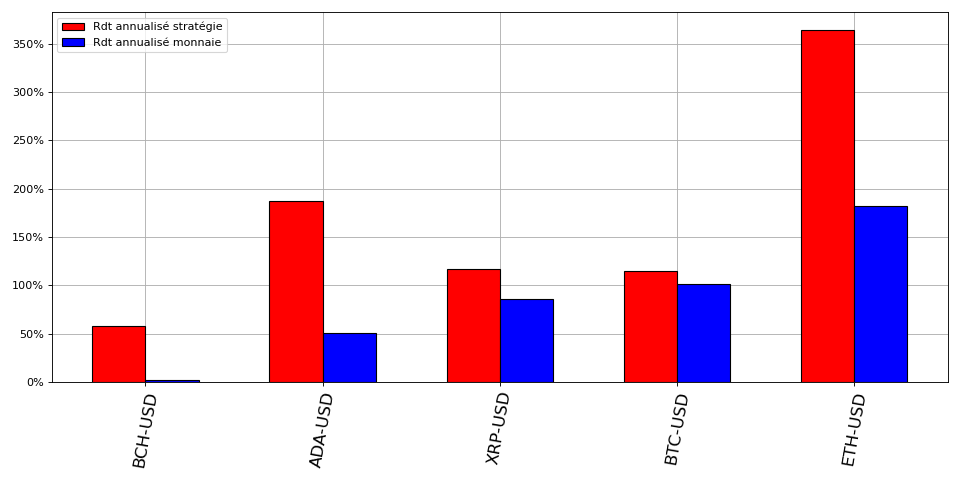

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

%matplotlib notebook

fig, ax = plt.subplots(figsize = (12,6))

barWidth = 0.3


df = strategy.resultsTable[["Ticker", 'Strategy Annualized Return %', 'Asset Annualized Return %']]


df = df.sort_values(by=['Asset Annualized Return %'])


labels = df["Ticker"]
a = df['Strategy Annualized Return %']*100
b = df['Asset Annualized Return %']*100


r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]


ax.bar(r1, a, color='red', width=barWidth, edgecolor='black', label='Rdt annualisé stratégie', align='edge', zorder=3, 
      linewidth=1)
ax.bar(r2, b, color='blue', width=barWidth, edgecolor='black', label='Rdt annualisé monnaie', align='edge', zorder=3, 
      linewidth=1)

plt.xticks([r + barWidth for r in range(len(labels))], labels, rotation=80, fontsize=15)


ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()

ax.grid(zorder=0)

ax.legend()


plt.show()

## Sharpe ratios

<IPython.core.display.Javascript object>


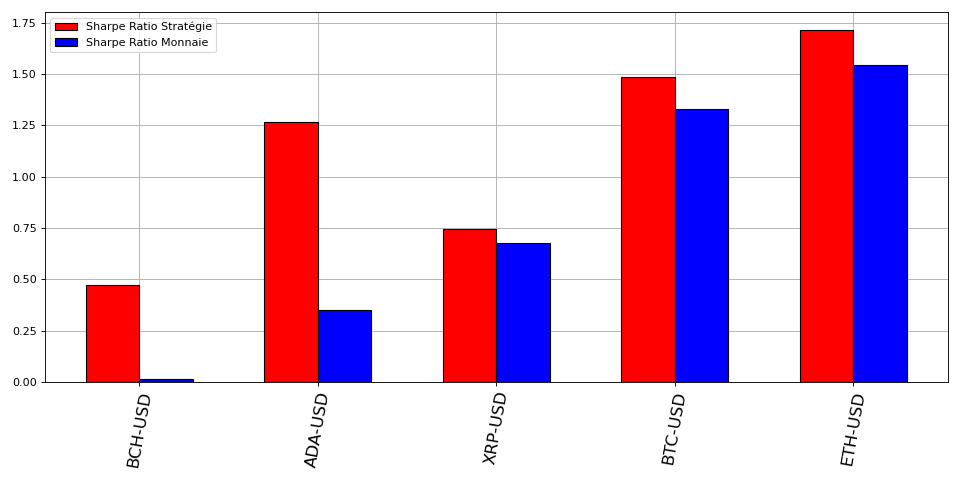

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

%matplotlib notebook

fig, ax = plt.subplots(figsize = (12,6))

barWidth = 0.3


df = strategy.resultsTable[["Ticker", 'Strategy Sharpe Ratio', 'Asset Sharpe Ratio']]


df = df.sort_values(by=['Asset Sharpe Ratio'])


    
labels = df["Ticker"]
a = df['Strategy Sharpe Ratio']
b = df['Asset Sharpe Ratio']


r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]


ax.bar(r1, a, color='red', width=barWidth, edgecolor='black', label='Sharpe Ratio Stratégie', align='edge', zorder=3, 
      linewidth=1)
ax.bar(r2, b, color='blue', width=barWidth, edgecolor='black', label='Sharpe Ratio Monnaie', align='edge', zorder=3, 
      linewidth=1)


plt.xticks([r + barWidth for r in range(len(labels))], labels, rotation=80, fontsize=15)


plt.tight_layout()

ax.grid(zorder=0)


ax.legend()


plt.show()


## Saisonnalité des pertes et profits

<IPython.core.display.Javascript object>


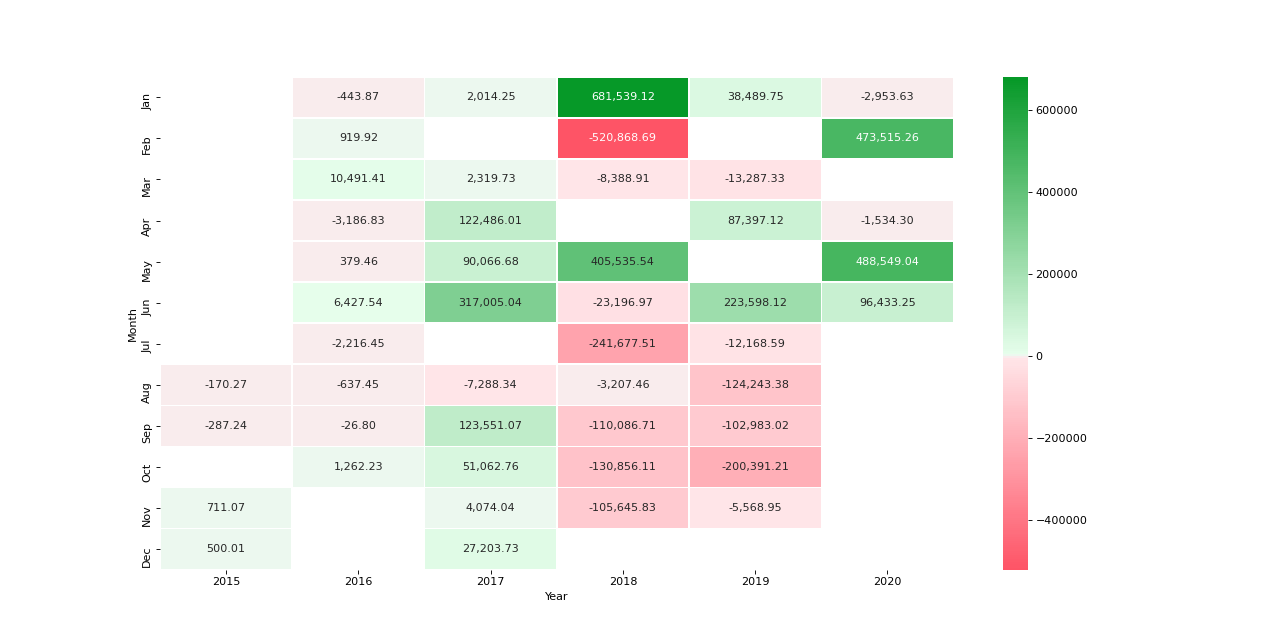

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib notebook

fig, ax = plt.subplots(figsize = (16,8))

seasonTable = strategy.seasonalityTable()
seasonTable[seasonTable == 0] = np.nan
seasonTable = seasonTable.sort_values(by="Month")

seasonTable = seasonTable.reindex(['Jan', 'Feb', 'Mar', "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct",
    "Nov", "Dec"])

cmap = sns.diverging_palette(h_neg=10, h_pos=130, s=99, l=55, as_cmap=True, sep=1)

sns.heatmap(seasonTable, linewidths=.5, cmap=cmap, center=0, fmt=',.2f', annot=True)


plt.show()

# Evolution de la balance des portefeuilles

<IPython.core.display.Javascript object>


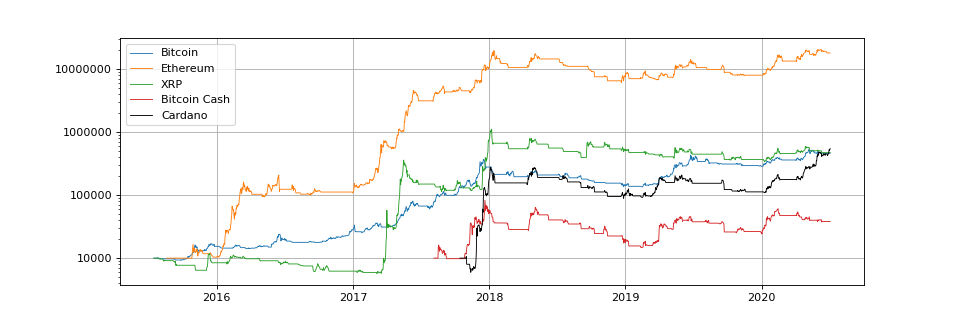

Working on ticker 1 / 1 (BTC-USD)
Done !
Working on ticker 1 / 1 (ETH-USD)
Done !
Working on ticker 1 / 1 (XRP-USD)
Done !
Working on ticker 1 / 1 (BCH-USD)
Done !
Working on ticker 1 / 1 (ADA-USD)
Done !


In [29]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

fig, ax = plt.subplots(figsize = (12,4))

cryptolist =  ['BTC-USD', 'ETH-USD', 'XRP-USD', 'BCH-USD', 'ADA-USD']



btc = mb.strategyDefiner(["BTC-USD"], 8, 13, "2015-7-3", "2020-07-3", shortLong="long",
                                 maType="exp", commission=.0035, capital=10_000, rf=.00133)
btc.analyse()
eth = mb.strategyDefiner(['ETH-USD'], 8, 13, "2015-7-3", "2020-07-3", shortLong="long",
                                 maType="exp", commission=.0035, capital=10_000, rf=.00133)
eth.analyse()
xrp = mb.strategyDefiner(['XRP-USD'], 8, 13, "2015-7-3", "2020-07-3", shortLong="long",
                                 maType="exp", commission=.0035, capital=10_000, rf=.00133)
xrp.analyse()
bch = mb.strategyDefiner(['BCH-USD'], 8, 13, "2015-7-3", "2020-07-3", shortLong="long",
                                 maType="exp", commission=.0035, capital=10_000, rf=.00133)
bch.analyse()

ada = mb.strategyDefiner(['ADA-USD'], 8, 13, "2015-7-3", "2020-07-3", shortLong="long",
                                 maType="exp", commission=.0035, capital=10_000, rf=.00133)
ada.analyse()

plt.plot(btc.portfolioBalanceEvolution, label="Bitcoin", linewidth=.8)
plt.plot(eth.portfolioBalanceEvolution, label="Ethereum", linewidth=.8)
plt.plot(xrp.portfolioBalanceEvolution, label="XRP", linewidth=.8)
plt.plot(bch.portfolioBalanceEvolution, label="Bitcoin Cash", linewidth=.8)
plt.plot(ada.portfolioBalanceEvolution, label="Cardano", color="black", linewidth=.8)


plt.yscale("log")

from matplotlib.ticker import ScalarFormatter

for axis in [ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
    
    
ax.legend()

ax.grid(True)

plt.show()